In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import keras

In [ ]:
import os

directory = '/content/drive/MyDrive/Pest_V2/Pest_V2'
print(os.listdir(directory))

['rice leaf caterpillar', 'small brown plant hopper', 'rice leaf roller', 'paddy stem maggot', 'rice leafhopper', 'asiatic rice borer', 'brown plant hopper', 'rice gall midge', 'rice water weevil', 'yellow rice borer']


In [ ]:
IMAGE_SIZE = 312
BATCH_SIZE = 30
CHANNELS = 3
EPOCHS = 80

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Pest_V2/Pest_V2',shuffle = True,image_size = (IMAGE_SIZE,IMAGE_SIZE), batch_size = 32)

Found 3166 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
print(class_names)

['asiatic rice borer', 'brown plant hopper', 'paddy stem maggot', 'rice gall midge', 'rice leaf caterpillar', 'rice leaf roller', 'rice leafhopper', 'rice water weevil', 'small brown plant hopper', 'yellow rice borer']


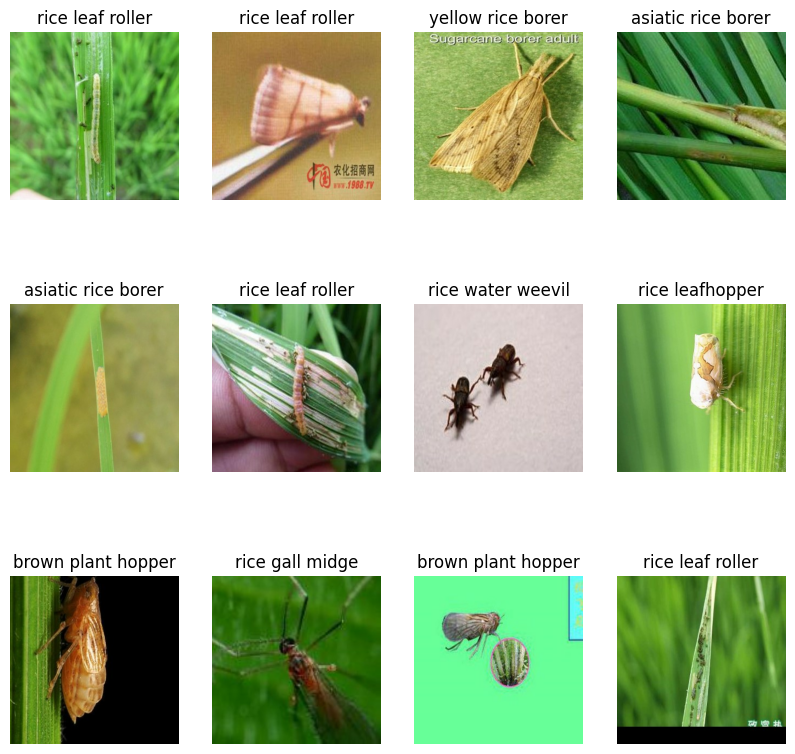

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')


In [ ]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size =10000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

79
9
11


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
     ])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation = 'softmax')

])
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (30, 312, 312, 3)         0         
                                                                 
 sequential_1 (Sequential)   (30, 312, 312, 3)         0         
                                                                 
 conv2d (Conv2D)             (30, 310, 310, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (30, 155, 155, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (30, 153, 153, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (30, 76, 76, 32)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose =1,
    validation_data=val_ds
)

Epoch 1/80
79/79 [==============================] - 442s 277ms/step - loss: 0.8704 - accuracy: 0.7371 - val_loss: 0.8199 - val_accuracy: 0.7604
Epoch 2/80
79/79 [==============================] - 6s 75ms/step - loss: 0.7662 - accuracy: 0.7684 - val_loss: 0.7847 - val_accuracy: 0.7778
Epoch 3/80
79/79 [==============================] - 6s 77ms/step - loss: 0.7606 - accuracy: 0.7664 - val_loss: 0.7687 - val_accuracy: 0.7951
Epoch 4/80
79/79 [==============================] - 6s 76ms/step - loss: 0.7330 - accuracy: 0.7791 - val_loss: 0.7870 - val_accuracy: 0.7778
Epoch 5/80
79/79 [==============================] - 6s 77ms/step - loss: 0.7090 - accuracy: 0.7811 - val_loss: 0.7093 - val_accuracy: 0.7951
Epoch 6/80
79/79 [==============================] - 6s 77ms/step - loss: 0.7112 - accuracy: 0.7803 - val_loss: 0.7004 - val_accuracy: 0.7674
Epoch 7/80
79/79 [==============================] - 6s 77ms/step - loss: 0.6917 - accuracy: 0.7827 - val_loss: 0.8480 - val_accuracy: 0.7639
Epoch 8/80

In [ ]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 13s 32ms/step - loss: 0.3304 - accuracy: 0.9286


NameError: name 'acc' is not defined

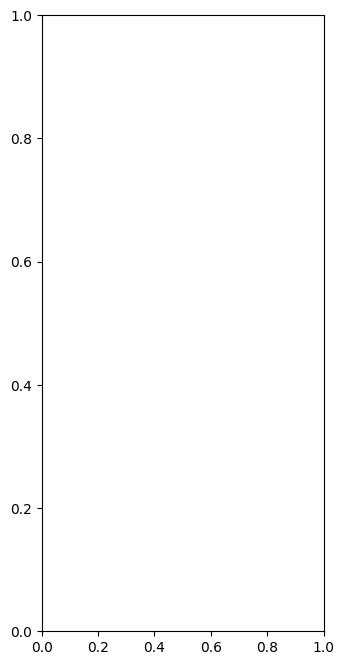

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Models')

In [ ]:
model.save('my_model.keras')

In [ ]:
model.save('my_model.h5')

In [ ]:
#for mobile app development

import tensorflow as tf
from tensorflow import keras
keras_model_path = 'my_model.h5'
keras_model = keras.models.load_model(keras_model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()


tflite_model_path = 'my_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

first image to predict
actual label: rice leaf roller
1/1 [==============================] - 0s 189ms/step
rice leaf roller


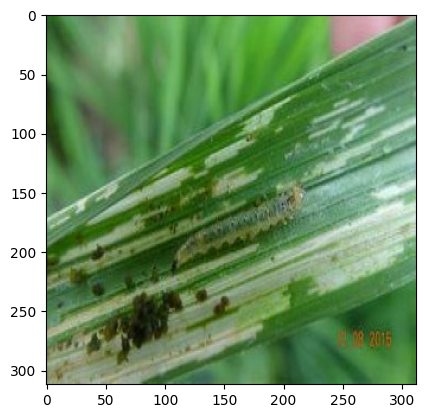

In [ ]:
import numpy as np
for images_batch,labels_batch  in test_ds.take(1):
  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction = model.predict(images_batch)


  print(class_names[np.argmax(batch_prediction[0])])


In [ ]:
def prediction_func(image,model):
  image = tf.keras.utils.load_img(image, target_size=(312, 312))
  input_image = np.expand_dims(image, axis=0)
  prediction = model.predict(input_image)
  print(class_names[np.argmax(prediction)])
  plt.imshow(image)

1/1 [==============================] - 0s 39ms/step
rice water weevil


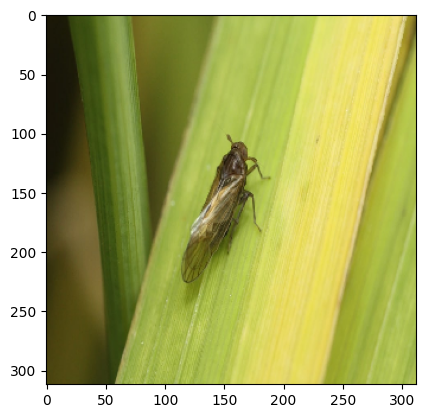

In [ ]:
prediction_func("/content/drive/MyDrive/12/IMG_4924.jpg",model)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Models')